<a href="https://colab.research.google.com/github/JonatanSiracusa/Grupo_Financiero_Galicia_Next_Open_Percent_Change/blob/main/Grupo_Financiero_Galicia_Next_Open_Percent_Change.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[INTRODUCCIÓN AL ESTUDIO](#scrollTo=zqEVea5qMdNq)

>[Inicio: carga de librerías, definición de Funciones y variables globales](#scrollTo=RzO8w1ysoR5P)

>[Carga de datos](#scrollTo=N2ZT3qWIY_5c)

>[Limpieza de datos](#scrollTo=KAjjl-EDoYZ_)

>[Transformación de datos](#scrollTo=1Ht6Zro3oje8)

>[Análisis y Visualizaciones](#scrollTo=-oZALeyloq56)

>>[Promedios](#scrollTo=Bb5clEyFRmd3)

>>[Medidas de dispersión](#scrollTo=6uEO2lnkUEZd)

>>[Estimación de Intervalos de Confianza de la variable "Variación porcentual al cierre"](#scrollTo=PxIgyv58YwNG)

>>>[1) Media y Desvío Estándar de la muestra](#scrollTo=LWMn7R74Zke-)

>>>[2) Medida de posible error (error estándar de las medias muestrales)](#scrollTo=cKxmVvqMbYee)

>>>[3) Intervalos de confianza: cálculo y gráficos](#scrollTo=EkdFaTHhdSlb)

>[Conclusión](#scrollTo=q7ppUWSYpA7A)



# INTRODUCCIÓN AL ESTUDIO

El objetivo del presente estudio es determinar con un grado de certeza relativamente alto cuál sería la variación porcentual del precio de cierre de la cotización de un día respecto de la cotización de cierre del día anterior de la acción Grupo Financiero Galicia.

De esta forma, sería posible plantear escenarios futuros con mayor precisión en función del avance o retroceso porcentual que pudiese tener el precio de la acción de una rueda hacia la otra.

En el estudio se toman cotizaciones diarias, desde el año 1997 a 2022, al fin de cubrir variados eventos económicos, políticos y sociales que sucedieron en la Argentina y que, lógicamente, afectaron las cotizaciones de la acción a lo largo de tiempo.


# Inicio: carga de librerías, definición de Funciones y variables globales

In [1]:
# Importo las librerías que se van a necesitar
import pandas as pd
import numpy as np # Importamos Numpy para poder utilizar arrays
from numpy import log as ln
from scipy import stats
from scipy.stats import norm
import statistics as st


# Declaro las variables globales
DIAS_V_H = 40
RUEDAS_POR_ANIO = 252
FECHA_INICIO_MUESTRA = '1997-01-01'
FECHA_FIN_MUESTRA = '2099-01-01'
NIVEL_SIGNIFICACION = 0.05
FECHA_VENC_EJERCICIOS = ['2022-04-15', '2022-06-17']


# Escribo las funciones que serán usadas durante el estudio:

def tomar_muestra_df(df, fecha_inicio, fecha_fin='2099-12-31'):
  """ Esta funcion toma las filas del DF que se encuentran entre fecha_inicio y
      fecha_fin
  """

  mask = ((df['fecha_date'] >= fecha_inicio) & (df['fecha_date'] <= fecha_fin))
  return df.loc[mask]


def volatilidad_historica(dias_vh, fecha_ultimo_cierre, dias_calendario = RUEDAS_POR_ANIO):
  """ Esta función calcula la Volatilidad Histórica de una activo financiero y retorna
      el valor expresado en porcentaje (ya que los valores de 'var_cierre_porcentual' tmb).
  """

  indice_fecha_fin  = int(df[df['fecha_date'] == fecha_ultimo_cierre].index[0])
  indice_fecha_inicio = indice_fecha_fin - dias_vh

  if (indice_fecha_fin - indice_fecha_inicio) < dias_vh:
    return "ERROR"
  else:
    fecha_inicio = df['fecha_date'][indice_fecha_inicio]

    mask = ((df['fecha_date'] > fecha_inicio) & (df['fecha_date'] <= fecha_ultimo_cierre))
    df_vh = df.loc[mask]

    values = np.array(df_vh['var_cierre_porcentual'])
    
    v_h = (st.stdev(values)) * (dias_calendario ** (1/2))
    return v_h



# Carga de datos

In [2]:
path = 'https://raw.githubusercontent.com/JonatanSiracusa/Grupo_Financiero_Galicia_Next_Open_Percent_Change/main/ggal.csv'
df_especie = pd.read_csv(path)

# Limpieza de datos

Del DataFrame con los datos de la población elimino columnas que no serán usadas en este estudio.

In [3]:
df_especie.drop_duplicates
del df_especie['volumen']
del df_especie['timestamp']

df_especie

,especie,fecha,apertura,maximo,minimo,cierre
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128
...,...,...,...,...,...,...
8241,GGAL,2024-07-04,4006.00000,4050.00000,3990.10000,3996.35010
8242,GGAL,2024-07-05,3957.00000,4037.00000,3925.00000,3971.00000
8243,GGAL,2024-07-08,3982.00000,4010.00000,3925.00000,3979.00000
8244,GGAL,2024-07-10,4040.00000,4110.00000,4015.00000,4100.00000


# Transformación de datos

Comenzamos con la transformación de los datos y posterior selección de la muestra a estudiar.

In [4]:
# Convierto 'fecha' str a 'fecha_date' datetime
df_especie['fecha'] = pd.to_datetime(df_especie['fecha'], format='%Y-%m-%d')
df_especie.rename(columns={'fecha': 'fecha_date'}, inplace=True)

df_especie

,especie,fecha_date,apertura,maximo,minimo,cierre
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128
...,...,...,...,...,...,...
8241,GGAL,2024-07-04,4006.00000,4050.00000,3990.10000,3996.35010
8242,GGAL,2024-07-05,3957.00000,4037.00000,3925.00000,3971.00000
8243,GGAL,2024-07-08,3982.00000,4010.00000,3925.00000,3979.00000
8244,GGAL,2024-07-10,4040.00000,4110.00000,4015.00000,4100.00000


Usando los datos de la población total, creo columnas con nuevos cálculos que luego serán usados en distintos análisis.

In [5]:
# Agrego la variacion nominal respecto del cierre anterior.
df_especie['var_cierre_nominal'] = (df_especie['cierre'] - df_especie['cierre'].shift())

# Agrego la variacion porcentual respecto del cierre anterior.
df_especie['var_cierre_porcentual'] = ((df_especie['cierre'] / df_especie['cierre'].shift()) - 1 ) * 100

# Agrego el rango nominal = max del dia - min del dia
df_especie['rango_diario_nominal'] = df_especie['maximo'] - df_especie['minimo']

# Agrego el rango porcentual = (max del dia - min del dia) / cierre anterior
df_especie['rango_diario_porcentual'] = ((df_especie['maximo'] - df_especie['minimo']) / df_especie['cierre'].shift()) * 100

df_especie = df_especie.fillna(0)

df_poblacion = df_especie
df_poblacion

,especie,fecha_date,apertura,maximo,minimo,cierre,var_cierre_nominal,var_cierre_porcentual,rango_diario_nominal,rango_diario_porcentual
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338,0.00000,0.000000,0.00025,0.000000
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289,-0.00049,-2.095808,0.00038,1.625321
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251,-0.00038,-1.660114,0.00038,1.660114
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202,-0.00049,-2.176810,0.00000,0.000000
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128,-0.00074,-3.360581,0.00049,2.225250
...,...,...,...,...,...,...,...,...,...,...
8241,GGAL,2024-07-04,4006.00000,4050.00000,3990.10000,3996.35010,-3.75000,-0.093748,59.90000,1.497463
8242,GGAL,2024-07-05,3957.00000,4037.00000,3925.00000,3971.00000,-25.35010,-0.634331,112.00000,2.802557
8243,GGAL,2024-07-08,3982.00000,4010.00000,3925.00000,3979.00000,8.00000,0.201461,85.00000,2.140519
8244,GGAL,2024-07-10,4040.00000,4110.00000,4015.00000,4100.00000,121.00000,3.040965,95.00000,2.387535


Seleccionamos el rango de fechas a estudiar, es decir, nuestra muestra.

Decido tomar como muestra los datos desde el año 1997, con el fin de abarcar el período final de la Convertibilidad y su posterior crisis económica.

In [6]:
# Creo un nuevo DF con las cotizaciones de un determinado periodo de tiempo. Esta es nuestra muestra.
fecha_inicio = FECHA_INICIO_MUESTRA
df = tomar_muestra_df(df_especie, fecha_inicio)

# Reinicio los indices del nuevo DF
df = df.reset_index(drop=True)

# Agrego un indice "n" en la columna 0
df.insert(0, 'n', 1, allow_duplicates=False)
df['n'] = df['n'].cumsum()

df

,n,especie,fecha_date,apertura,maximo,minimo,cierre,var_cierre_nominal,var_cierre_porcentual,rango_diario_nominal,rango_diario_porcentual
0,1,GGAL,1997-01-02,1.45160,1.46369,1.43950,1.45643,0.00241,0.165747,0.02419,1.663663
1,2,GGAL,1997-01-03,1.45643,1.46611,1.45643,1.46369,0.00726,0.498479,0.00968,0.664639
2,3,GGAL,1997-01-06,1.47579,1.48063,1.46369,1.47579,0.01210,0.826678,0.01694,1.157349
3,4,GGAL,1997-01-07,1.47579,1.49514,1.47579,1.49514,0.01935,1.311162,0.01935,1.311162
4,5,GGAL,1997-01-08,1.50724,1.54837,1.50724,1.52418,0.02904,1.942293,0.04113,2.750913
...,...,...,...,...,...,...,...,...,...,...,...
6739,6740,GGAL,2024-07-04,4006.00000,4050.00000,3990.10000,3996.35010,-3.75000,-0.093748,59.90000,1.497463
6740,6741,GGAL,2024-07-05,3957.00000,4037.00000,3925.00000,3971.00000,-25.35010,-0.634331,112.00000,2.802557
6741,6742,GGAL,2024-07-08,3982.00000,4010.00000,3925.00000,3979.00000,8.00000,0.201461,85.00000,2.140519
6742,6743,GGAL,2024-07-10,4040.00000,4110.00000,4015.00000,4100.00000,121.00000,3.040965,95.00000,2.387535


# Análisis y Visualizaciones

Trabajamos sobre la muestra tomada de la población de datos, haciendo los análisis necesarios.




Lo primero que hacemos es crear una serie (arreglo de 1 dimensión) de los valores a analizar.

En este caso, vamos a analizar la Variación Porcentual del precio del activo al cierre de cada rueda, respecto de la rueda anterior.

In [7]:
values = np.array(df['var_cierre_porcentual'])
n = len(values)

## Promedios

**Media, Mediana y Moda**

In [8]:
from scipy import stats

mu = np.mean(values)

values_sorted = np.sort(values), 
mediana = np.median(values_sorted)

moda, count = stats.mode(values)

print (f'La Media de la muestra es: {mu}\n')
print (f'Los valores ordenados son los siguientes:{values_sorted}.\nLa Mediana de la muestra es: {mediana}\n')
print (f'Los cantidad de valores anaizados son los siguientes: {count}.\nLa Moda de la muestra es: {moda}')

La Media de la muestra es: 0.18445288471805887

Los valores ordenados son los siguientes:(array([-47.06387854, -44.67623436, -24.17643132, ...,  44.72842234,
        51.01857592,  89.73353645]),).
La Mediana de la muestra es: 0.0

Los cantidad de valores anaizados son los siguientes: [372].
La Moda de la muestra es: [0.]


## Medidas de dispersión

**Varianza y Desviación Estándar**

In [9]:
import statistics as st

var = st.variance(values)
sigma = st.stdev(values)

print (f'La Varianza de la muestra es la siguiente: {var}.\nEl Desvío Estándar de la muestra es: {sigma}')

La Varianza de la muestra es la siguiente: 13.670310001337912.
El Desvío Estándar de la muestra es: 3.697338231936309


**Volatilidad histórica**

Calculamos la Volatilidad Histórica del activo financiero analizado.
El número de ruedas a tomar para calcular la V.H. es el indicado en la variable global "DIAS_V_H". 

In [10]:
fecha = '2022-06-23'
v_h = volatilidad_historica(DIAS_V_H, fecha)

print (f'La Volatilidad Histórica de las últimas {DIAS_V_H} ruedas, a partir del {fecha} es: {v_h}%')

La Volatilidad Histórica de las últimas 40 ruedas, a partir del 2022-06-23 es: 31.864626709100573%


## Estimación de Intervalos de Confianza de la variable "Variación porcentual al cierre"

### 1) Media y Desvío Estándar de la muestra

In [11]:
values = np.array(df['var_cierre_porcentual'])

mu = np.mean(values)
var = st.variance(values)
sigma = st.stdev(values)

print('La Media de la muestra es:', round(mu, 6), 'puntos porcentuales.')
print('La Varianza de la muestra es:', round(var, 6), 'puntos porcentuales.')
print('El Desvío Estándar de la muestra es:', round(sigma, 6), 'puntos porcentuales.')

La Media de la muestra es: 0.184453 puntos porcentuales.
La Varianza de la muestra es: 13.67031 puntos porcentuales.
El Desvío Estándar de la muestra es: 3.697338 puntos porcentuales.


### 2) Medida de posible error (error estándar de las medias muestrales)

In [12]:
values_poblacion = np.array(df_poblacion['var_cierre_porcentual'])
sigma_poblacion = st.stdev(values_poblacion)

error = sigma_poblacion / (np.sqrt(n))

print('El Error Estándar de la media de la muestra es:', round(error, 6), 'puntos porcentuales.')

El Error Estándar de la media de la muestra es: 0.046293 puntos porcentuales.


### 3) Intervalos de confianza: cálculo y gráficos

Los intervalos de confianza de la variación porcentual de precio de una rueda a la siguiente, son los siguientes:

In [13]:
# 1er intervalo de confianza
q_sigma = 1
lim_inf_1 = mu - (q_sigma * sigma)  # * ((1-NIVEL_SIGNIFICACION)/2))
lim_sup_1 = mu + (q_sigma * sigma) # * ((1-NIVEL_SIGNIFICACION)/2))
intervalo_1sigma = lim_sup_1 - lim_inf_1


# 2do intervalo de confianza
q_sigma = 2
lim_inf_2 = mu - (q_sigma * sigma) # * ((1-NIVEL_SIGNIFICACION)/2))
lim_sup_2 = mu + (q_sigma * sigma) # * ((1-NIVEL_SIGNIFICACION)/2))
intervalo_2sigma = lim_sup_2 - lim_inf_2


# 3er intervalo de confianza
q_sigma = 3
lim_inf_3 = mu - (q_sigma * sigma) # * ((1-NIVEL_SIGNIFICACION)/2))
lim_sup_3 = mu + (q_sigma * sigma) # * ((1-NIVEL_SIGNIFICACION)/2))
intervalo_3sigma = lim_sup_3 - lim_inf_3

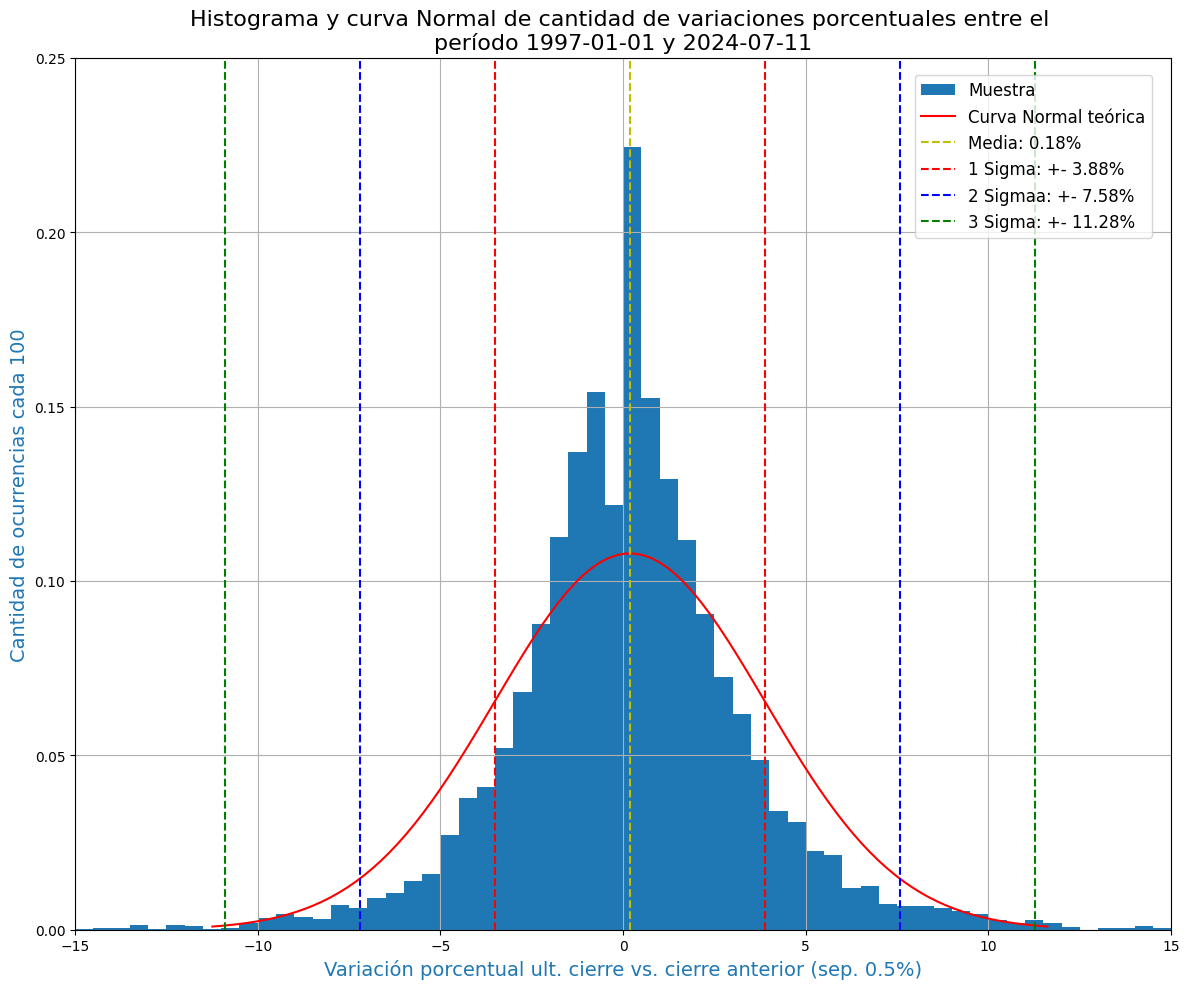

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

x = values
xmin = -15
xmax = 15

# Creo una distribucion normal con el mu y el sigma de nuestra muestra
dist = norm(loc=mu, scale=sigma)
values_dist = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Genero los intervalos
intervalos = []
i = xmin
while i <= xmax:
  intervalos.append(i)
  i += 0.5

# Determino el tamaño del gráfico
fig = plt.figure(figsize=(12,10))
ax = fig.subplots()

# El histograma usa los datos de entrada de 'x', 
# le indico que los normalice, es decir, que todos los valores sumen 1.
ax.hist(x, intervalos, density=True, label="Muestra")

# Dibujo la curva Normal con el mu y el sigma de nuestra muestra
ax.plot(values_dist, dist.pdf(values_dist), "r-", label="Curva Normal teórica")

ax.set_xlabel('Variación porcentual ult. cierre vs. cierre anterior (sep. 0.5%)', fontdict={'size':14, 'color':'C0'})
ax.set_ylabel('Cantidad de ocurrencias cada 100', fontdict={'size':14, 'color':'C0'})
ax.set_title(f"Histograma y curva Normal de cantidad de variaciones porcentuales entre el \nperíodo {FECHA_INICIO_MUESTRA} y {df['fecha_date'][len(df) - 1].strftime('%Y-%m-%d')}", fontdict={'size':16})

# Dibujo lineas verticales con el mu y los límites de los intervalos de confianza
ax.axvline(mu, color='y', linestyle='--', label=f'Media: {round(mu, 2)}%')
ax.axvline(lim_inf_1, color='r', linestyle='--')
ax.axvline(lim_sup_1, color='r', linestyle='--', label=f'1 Sigma: +- {round(lim_sup_1, 2)}%')
ax.axvline(lim_inf_2, color='b', linestyle='--')
ax.axvline(lim_sup_2, color='b', linestyle='--', label=f'2 Sigmaa: +- {round(lim_sup_2, 2)}%')
ax.axvline(lim_inf_3, color='g', linestyle='--')
ax.axvline(lim_sup_3, color='g', linestyle='--', label=f'3 Sigma: +- {round(lim_sup_3, 2)}%')
ax.legend(loc="upper right", bbox_to_anchor=(0.99, 0.99), prop={'size': 12})


plt.xlim(0,10)
plt.ylim(0,10)
# axis: x0,x1,y0, y1
plt.axis([xmin, xmax, 0, 0.25])
plt.grid(True)

fig.tight_layout()
plt.savefig('plot_1_ggal_var_cierre.jpg', dpi=300)
plt.show()

In [15]:

print(f'\nLa Media de la VARIACIÓN PORCENTUAL AL CIERRE de la muestra es de: {round(mu, 6)}\n')
print(f'En el Intervalo de {round(lim_inf_1, 2)}% a {round(lim_sup_1, 2)}% hay una probabilidad de {0.3413*2*100}%.')
print(f'El Intervalo de confianza de 1 DS es: {round(intervalo_1sigma, 2)}%')
print(f'Límite inferior: {round(lim_inf_1, 2)}%')
print(f'Límite superior: {round(lim_sup_1, 2)}%\n')

print(f'En el Intervalo de {round(lim_inf_2, 2)}% a {round(lim_sup_2, 2)}% hay una probabilidad de {0.4772*2*100}%.')
print(f'El Intervalo de confianza de 2 DS es: {round(intervalo_2sigma, 2)}%')
print(f'Límite inferior: {round(lim_inf_2, 2)}%')
print(f'Límite superior: {round(lim_sup_2, 2)}%\n')

print(f'En el Intervalo de {round(lim_inf_3, 2)}% a {round(lim_sup_3, 2)}% hay una probabilidad de {0.4986*2*100}%.')
print(f'El Intervalo de confianza de 3 DS es: {round(intervalo_3sigma, 2)}%')
print(f'Límite inferior: {round(lim_inf_3, 2)}%')
print(f'Límite superior: {round(lim_sup_3, 2)}%\n')


La Media de la VARIACIÓN PORCENTUAL AL CIERRE de la muestra es de: 0.184453

En el Intervalo de -3.51% a 3.88% hay una probabilidad de 68.26%.
El Intervalo de confianza de 1 DS es: 7.39%
Límite inferior: -3.51%
Límite superior: 3.88%

En el Intervalo de -7.21% a 7.58% hay una probabilidad de 95.44%.
El Intervalo de confianza de 2 DS es: 14.79%
Límite inferior: -7.21%
Límite superior: 7.58%

En el Intervalo de -10.91% a 11.28% hay una probabilidad de 99.72%.
El Intervalo de confianza de 3 DS es: 22.18%
Límite inferior: -10.91%
Límite superior: 11.28%



# Conclusión

Una vez analizados y procesados los distintos datos, teniendo en cuenta que el fin del presente estudio es generar información que sea de utilidad para el análisis y ejecución de distintas estrategias de cobertura y/o especulación con derivados financieros, nos basaremos en el siguiente gráfico para enunciar las conclusiones.



<img src="https://raw.githubusercontent.com/JonatanSiracusa/Grupo_Financiero_Galicia_Next_Open_Percent_Change/main/plot_1_ggal_var_cierre.png" width=800>


Como podemos ver en el gráfico, se puede observar lo siguiente:

> 1) La variación porcentual de cierre de la cotización de la acción de una rueda a otra, puede estar dentro del rango de -3.33% a +3.61% con una probabilidad o seguridad del 68.26%.

> 2) La variación porcentual de cierre de la cotización de la acción de una rueda a otra, puede estar dentro del rango de -6.81% a +7.08% con una probabilidad o seguridad del 95.44%.

> 3) La variación porcentual de cierre de la cotización de la acción de una rueda a otra, puede estar dentro del rango de -10.28% a +10.55% con una probabilidad o seguridad del 99.72%.


Una de las tantas utilidades de las mencionadas conclusiones es prever y plantear escenarios de "cuánto puede variar la acción" de una rueda a otra y, así, poder diseñar estrategias de cobertura o especulativas teniendo en cuenta "cuánto es lo que puediese llegar a variar" el precio de la acción de una rueda a otra. 



